### Bar Charts

For the bar charts, we will use `plt.bar()` method instead of `plt.plot()` which we use for line charts. We will continue with the previous example. 

In [26]:
import matplotlib.pyplot as plt

In [27]:
# list of Ages
dev_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# list of Salaries for All Developers
dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

# list of Salaries for Phyton developers
py_dev_y = [45372, 48876, 53850, 57287, 63016,
             65998, 70003, 70000, 71496, 75370, 83640]


# list of Salaries for JavaScript developers  
js_dev_y = [37810, 43515, 46823, 49293, 53437,
             56373, 62375, 66674, 68745, 68746, 74583]

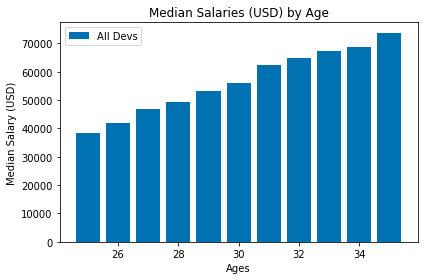

In [28]:
plt.style.use('seaborn-colorblind')

plt.bar(dev_x, dev_y, label = "All Devs") 

# add labels
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

# add Title
plt.title("Median Salaries (USD) by Age") 

# add legend
plt.legend()

# arange padding
plt.tight_layout()

# display the plot
plt.show()

### Multiple Bars

If we add additional bars to the plot as we did with line charts, here is the result:  


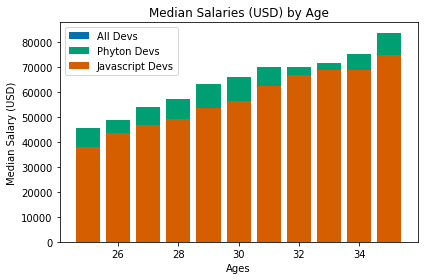

In [29]:
plt.style.use('seaborn-colorblind')

plt.bar(dev_x, dev_y, label = "All Devs") 
plt.bar(dev_x, py_dev_y, label = "Phyton Devs") 
plt.bar(dev_x, js_dev_y, label = "Javascript Devs") 

# add labels
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

# add Title
plt.title("Median Salaries (USD) by Age") 

# add legend
plt.legend()

# arange padding
plt.tight_layout()

# display the plot
plt.show()

We can't even see bars for "All Devs". We can place them side by side. We will use numpy array to do that. First we store length of ages to a numpy array and use it as the "x-index" argument instead of "dev_x" variable in `plt.bar()` method. To place three bars next to each other, we subtract one "width" (previously assigned) from the "x-index" of the first bar and add one "width" to the "x-index" of the third bar. We should also pass in that "width" as an argument in `plt.bar()` method. If we show the plot as it is, we see indexes ranging from 0 to length of "Ages" list under the x - ax. To fix that we use `plt.xticks(ticks=x_indexes, labels=dev_x)`. You can find the code below:      

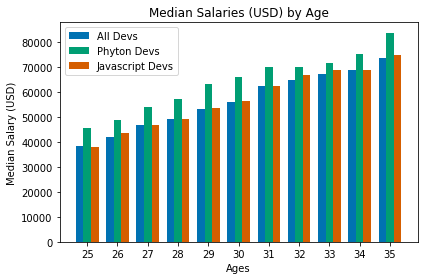

In [30]:
import numpy as np

x_indexes = np.arange(len(dev_x))
width = 0.25

plt.bar(x_indexes - width, dev_y, width = width, label = "All Devs") 
plt.bar(x_indexes, py_dev_y, width = width, label = "Phyton Devs") 
plt.bar(x_indexes + width, js_dev_y, width = width, label = "Javascript Devs") 

# add labels
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

# add Title
plt.title("Median Salaries (USD) by Age") 

# add legend
plt.legend()

# assign dev_x as the x labels
plt.xticks(ticks=x_indexes, labels=dev_x)

# arange padding
plt.tight_layout()

# display the plot
plt.show()

### Horizontal Bars

In this exercise we will use stackover survey dataset. From the dataset we will explore 15 most common used programming languages.

In [31]:
import pandas as pd

# read the dataset and take just the related columns
survey = pd.read_csv("Data/survey_results_public.csv")
cols = ["Respondent", "LanguageWorkedWith"]
survey = survey[cols]
print(survey.shape)
survey.head()

(88883, 2)


,Respondent,LanguageWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [32]:
# drop rows contains NaN values to prevent any possible errors 

survey = survey.dropna(subset=["LanguageWorkedWith"])
survey.shape

(87569, 2)

In [35]:
# A counter will count languages that take place in each row seperated with semi colons in the series 

from collections import Counter

language_counter = Counter()  

for language in survey["LanguageWorkedWith"]:
     if pd.notnull(language):  # get rid of the Nonetype objects, otherwise we get error
            language_counter.update(language.split(";"))

print(language_counter.most_common(15))  # returns a list and each item is a tupple

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


* To plot data we need to split out data and the counts in seperate lists and place them on X and Y axes.

In [36]:
languages = []
counts = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    counts.append(item[1])

print(languages)
print(counts)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


In [39]:
# Alternative way to split the list into two different list using zip function 

languages, counts = map(list, zip(*language_counter.most_common(15)))

print(languages)
print(counts)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


* Since we have two lists ready we can plot them. When we have a lot of values to plot, we can use horizontal bars. 

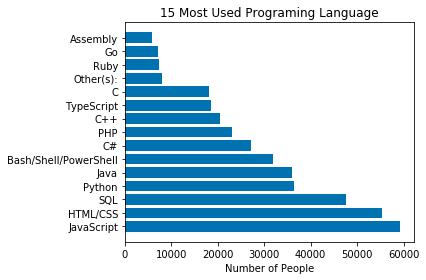

In [42]:
# use plt.barh method for horizontal bar
plt.barh(languages, counts)  

# add labels, no need y-label because it's self explanatory 
#plt.ylabel("Programing Languages")
plt.xlabel("Number of People")

# add Title
plt.title("15 Most Used Programing Language") 

# arange padding
plt.tight_layout()

# display the plot
plt.show()

* If we want the most used programing language at the top, we can simply reverse the lists.

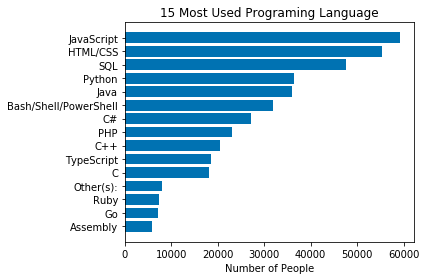

In [44]:
languages.reverse()
counts.reverse()

# use plt.barh method for horizontal bar
plt.barh(languages, counts)  

# add labels, no need y-label because it's self explanatory 
#plt.ylabel("Programing Languages")
plt.xlabel("Number of People")

# add Title
plt.title("15 Most Used Programing Language") 

# arange padding
plt.tight_layout()

# display the plot
plt.show()

Source: [Corey Schafer - Matplotlib Tutorial](https://www.youtube.com/watch?v=UO98lJQ3QGI&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_)